> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb_Movies Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

> which had most and least profit ?                 
> Movies with largest and lowest budgets ?                 
> Movies with longest and shortest runtime ?                 
> Movies with most and least earned revenue ?                   
> Average runtime of the movies ?                               
> Most popular genres over the years Vs Genres ?                       
> Months vs Number Of Movie Releases ?                         
> Year of release vs Profitability ?                                
> Succesful Genres ?                                     
> Most Frequent Cast ?                                                
> Budget of the movies ?                                         
> duration of the movies ?                         
> Revenue earned by the movies ?                            

In [69]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [71]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file
data = pd.read_csv('tmdb-movies.csv')
#printing first five rows with defined
print(data.head())
print('-------------------------')

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

 # Observations

1) It is not possible to rely on the feature of voting for films because it is not standardized         
2) No unit of currency  in the dataset (I'll assume it's the dollar) 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

> We need to remove unused column such .         
> Removing the duplicacy in the rows(if any).     
> Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be    
> discarding such entries    
> Changing release date column into date format.     
> Replacing zero with NAN in runtime column.         
> Changing format of budget and revenue column       

>1. Removing Unused columns

> remove the unused colums that are not needes in the analysis process
 
      

> This data is not used and must be maintained

In [72]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Remove unwanted data
delete_colom = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_average']

data= data.drop(delete_colom,1)
print(data.head(4))

      budget     revenue                original_title  \
0  150000000  1513528810                Jurassic World   
1  150000000   378436354            Mad Max: Fury Road   
2  110000000   295238201                     Insurgent   
3  200000000  2068178225  Star Wars: The Force Awakens   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Advent

> Data just got easier to handle


## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

>2. Removing the duplicacy in the rows(if any).

> The number of entries in the database

>The number of entries in the database must be known, dealt with and analyzed

In [73]:
rows, colom = data.shape
#We need to reduce the count of row by one.
print('The  total entries of movies {} and {} no.of columns in it.'.format(rows-1, colom))
print('-------------------------')

The  total entries of movies 10865 and 12 no.of columns in it.
-------------------------


 >After analysis, it was discovered that there are 10,865 entries in total for films and 10 columns in them.

> Now removing the duplicate rows if any

In [74]:
data.drop_duplicates(keep ='first', inplace=True)
rows, colom = data.shape

print('The now total entries of movies {} and {} no.of columns in it.'.format(rows-1, colom))
print('-------------------------')


The now total entries of movies 10864 and 12 no.of columns in it.
-------------------------


> After deletion, there are a total of 10,864 entries for the films and 10 columns in them.

> So there was a duplicate row and it has been removed now.

>3 Removing 0's from budget and the revenue columns

In [75]:
# creating a seperate list of revenue and budget column

temp_list=['budget', 'revenue']

data[temp_list] = data[temp_list].replace(0, np.NAN)


data.dropna(subset = temp_list, inplace = True)

rows, colom = data.shape
print(' now have only {} no.of movies.'.format(rows-1))
print('-------------------------')

 now have only 3853 no.of movies.
-------------------------


> And after all this deletion, why after removing these entries, only 3853 movie numbers are left.

>4. Changing the release date column 

In [76]:
data.release_date = pd.to_datetime(data['release_date'])
#print this chang
print(data.head(3))
print('-------------------------')

        budget       revenue      original_title  \
0  150000000.0  1.513529e+09      Jurassic World   
1  150000000.0  3.784364e+08  Mad Max: Fury Road   
2  110000000.0  2.952382e+08           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                      tagline  runtime  \
0           The park is open.      124   
1          What a Lovely Day.      120   
2  One Choice Can Destroy You      119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda..

>5. Replacing zero with NAN in runtime column.

In [77]:
# Replacing zero with NAN in runtime column.
data['runtime'] = data['runtime'].replace(0, np.NAN)
#print the data type
print(data.dtypes)
print('-------------------------')

budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
dtype: object
-------------------------


>we need to change budget and revenue to (int64)

In [78]:
#changing data type  (float64 to int64)
change_of_type=['budget', 'revenue']
data[change_of_type]= data[change_of_type].applymap(np.int64)
#After this change
print(data.dtypes)
print('-------------------------')


budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
dtype: object
-------------------------


>Changes done (budget, revenue)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Movies which had most and least profit)

> Calculating the profit of one movie

>insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)

In [79]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#insert function with three parameters
data.insert(2,'profit_earned',data['revenue']-data['budget'])
print(data.head(2))
print('-------------------------')


      budget     revenue  profit_earned      original_title  \
0  150000000  1513528810     1363528810      Jurassic World   
1  150000000   378436354      228436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

              tagline  runtime                                     genres  \
0   The park is open.      124  Action|Adventure|Science Fiction|Thriller   
1  What a Lovely Day.      120  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   release_year  
0          2015  
1          2015  
-------------------------


>Preview the changes in the data set

In [80]:
def calc(colum):
    #for highest earned profit
    high = pd.DataFrame(data.loc[data[colum].idxmax()])
    #for lowest earned profit
    low = pd.DataFrame(data.loc[data[colum].idxmin()])

    informations = pd.concat([high, low], axis=1)

    return informations

# call the funcyion to knowing highest profit_earned and lowest profit_earned
print(calc('profit_earned'))

                                                                   1386  \
budget                                                        237000000   
revenue                                                      2781505847   
profit_earned                                                2544505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
release_year             

> Column 1368 shows the highest profit_earned (2544505847) .

> column 2244 show the lowest profit_earned (-413912431) .

# Research Question 2 : Movies with largest and lowest budgets

>call the funcyion to knowing largest budget and smallest budget

In [84]:
# we will call the same function again
print(calc('budget'))
print('-------------------------')

                                                                   2244  \
budget                                                        425000000   
revenue                                                        11087569   
profit_earned                                                -413912431   
original_title                                        The Warrior's Way   
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                                     Sngmoo Lee   
tagline                                         Assassin. Hero. Legend.   
runtime                                                             100   
genres                        Adventure|Fantasy|Action|Western|Thriller   
production_companies                           Boram Entertainment Inc.   
release_date                                        2010-12-02 00:00:00   
vote_count                                                           74   
release_year             

>Column 2244 shows the largest budget  (425000000 $).

>column 2618 shows the smallest budget  (1 $) 

## Research Question 3 : Movies with longest and shortest runtime

> call the funcyion to knowing longest runtime and shortest runtime

In [85]:
# we will call the same function again
print(calc('runtime'))
print('-------------------------')

                                                                   2107  \
budget                                                         18000000   
revenue                                                          871279   
profit_earned                                                 -17128721   
original_title                                                   Carlos   
cast                  Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...   
director                                                Olivier Assayas   
tagline                                  The man who hijacked the world   
runtime                                                             338   
genres                                     Crime|Drama|Thriller|History   
production_companies  Egoli Tossell Film AG|Canal+|Arte France|Films...   
release_date                                        2010-05-19 00:00:00   
vote_count                                                           35   
release_year             

>Column 2107 shows the longest runtime (338 minutes) .

>column 5162 shows the shortest runtime (15 minutes).

# Research Question 4 : Movies with most and least earned revenue

call the funcyion to knowinglargest revenue earned and  smallest revenue earned

In [86]:
# we will call the same function again
print(calc('revenue'))
print('-------------------------')

                                                                   1386  \
budget                                                        237000000   
revenue                                                      2781505847   
profit_earned                                                2544505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
release_year             

>Column 1386 shows the largest revenue earned  (2781505847 $) .

>column 5067 shows the smallest revenue earned (2 $) .

### Research Question 5  (Average runtime of the movies)

 I need a function to Average runtime of the movies

In [87]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# column average function
def fun(column):
    return data[column].mean()

# function call
print(fun('runtime'))
print('-------------------------')

109.22029060716139
-------------------------


>the average runtime a movie is 109 minutes. 

### Research Question 6 (Most popular genres over the years Vs Genres)

<function matplotlib.pyplot.show(*args, **kw)>

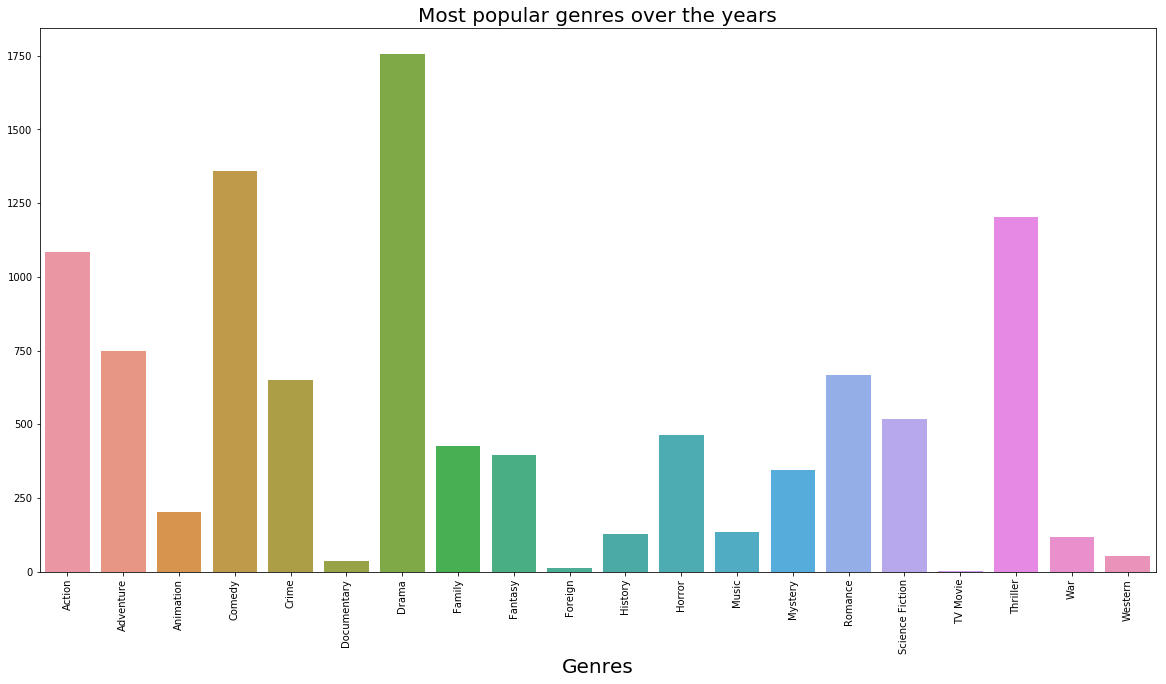

In [88]:
dg = data['genres'].str.get_dummies(sep='|')
dg1 = dg.sum().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x = dg.columns, y = dg.sum(), data = dg1)
plt.title('Most popular genres over the years', fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('')
plt.xticks(rotation= 90)
plt.show

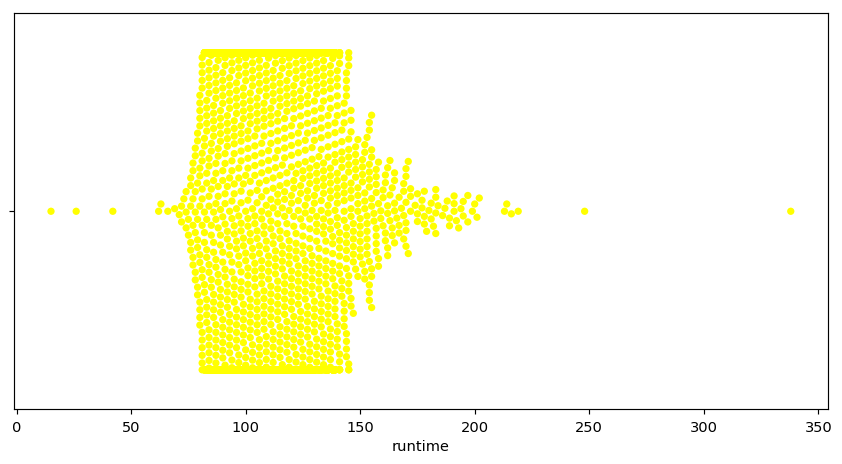

In [89]:
#The Second plots is the data points plot of runtime of movies
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(data['runtime'], color ='yellow')

plt.show()

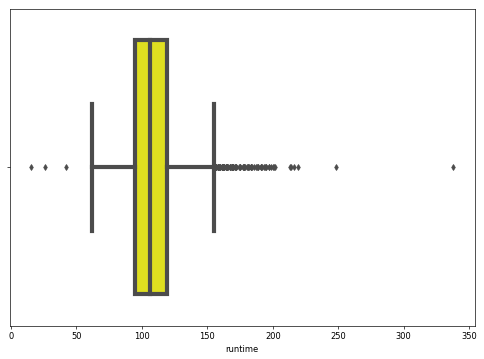

In [90]:
plt.figure(figsize=(10,7), dpi = 60 )

#The First plot is box plot of the runtime of the movies 

sns.boxplot(data['runtime'], linewidth = 5, color = 'yellow')

plt.show()

In [91]:
data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [92]:
release = data['release_date'].dt.month.value_counts().sort_index()
print(release)

1     225
2     257
3     279
4     267
5     291
6     340
7     316
8     337
9     460
10    363
11    304
12    415
Name: release_date, dtype: int64


### Research Question 7  (Months vs Number Of Movie Releases)

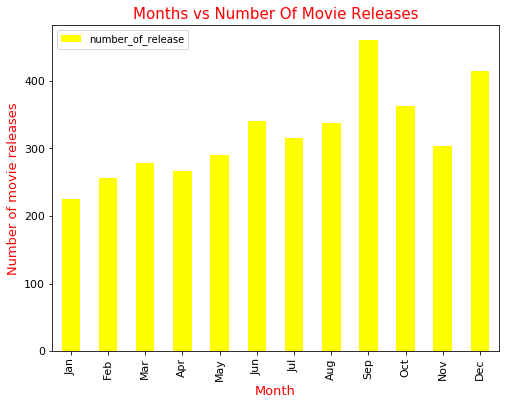

In [93]:
#histogram of Months vs Number Of Movie Releases
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

release = pd.DataFrame(release)

release['month'] = months

#change the column name
release.rename(columns = {'release_date':'number_of_release'},inplace=True)

release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6), color = 'yellow')

#set the labels and titles of the plot.

plt.title('Months vs Number Of Movie Releases',fontsize = 15, color = 'red')

plt.xlabel('Month',fontsize = 13, color = 'red')

plt.ylabel('Number of movie releases',fontsize = 13, color = 'red')

plt.show()



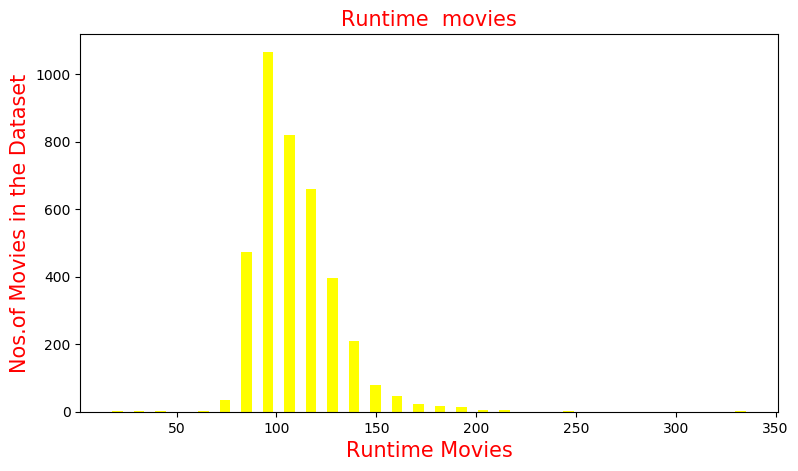

In [94]:
#  histogram of Runtime of the Movies
plt.figure(figsize=(9,5), dpi = 100)

plt.xlabel('Runtime Movies', fontsize = 15 , color = 'red')

plt.ylabel('Nos.of Movies in the Dataset', fontsize=15 , color = 'red')

plt.title('Runtime  movies', fontsize=15 , color = 'red')

plt.hist(data['runtime'], rwidth = 0.5, bins = 30 , color = 'yellow')

plt.show()

>Most of the movies are timed between (80) to (115) minutes. Almost (1000) and more no.of movies fall in this criteria.

> i need getting specific runtime 

In [97]:
# getting  runtime 
data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>After all this, we can conclude that :                   
>25% of movies have a runtime of less than 95 minutes                         
>50% of movies have a runtime of less than 109 minutes. (median)                 
>75% of movies have a runtime of less than 119 minutes                               

### Research Question 8 : Year of release vs Profitability

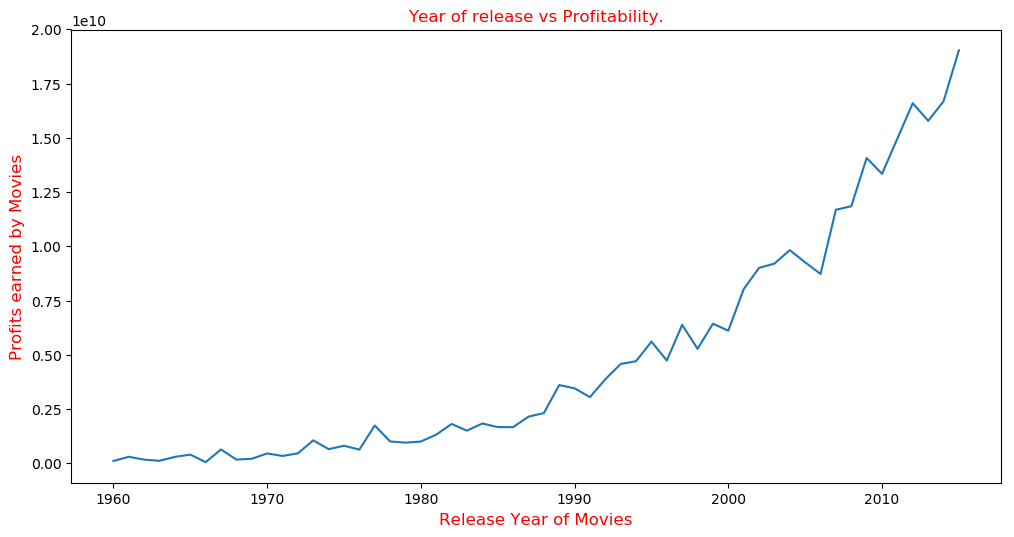

In [98]:
profits_year = data.groupby('release_year')['profit_earned'].sum()

plt.figure(figsize=(12,6), dpi = 100)

plt.xlabel('Release Year of Movies', fontsize = 12, color = 'red' )

plt.ylabel('Profits earned by Movies', fontsize = 12, color = 'red')

plt.title('Year of release vs Profitability.', color = 'red')

plt.plot(profits_year)

plt.show()

> i need to know which year made the highest profit?

In [99]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

> we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.

In [100]:
#selecting the movies having profit $50M or more

profit_data = data[data['profit_earned'] >= 50000000]

profit_data.index = range(len(profit_data))

profit_data.index = profit_data.index + 1

print('-------------------------')
print(profit_data.head(3))



-------------------------
      budget     revenue  profit_earned      original_title  \
1  150000000  1513528810     1363528810      Jurassic World   
2  150000000   378436354      228436354  Mad Max: Fury Road   
3  110000000   295238201      185238201           Insurgent   

                                                cast          director  \
1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
2  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
3  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                      tagline  runtime  \
1           The park is open.      124   
2          What a Lovely Day.      120   
3  One Choice Can Destroy You      119   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   
3         Adventure|Science Fiction|Thriller   

                                production_companies release_d

In [101]:
#counting the no.of rows in the new data base

print(len(profit_data))

print('-------------------------')

1338
-------------------------


>our dataset is reduced to 1338 from 3853 

# Research Question 9 : Succesful Genres

> I need to create a function which will take any column as argument from and keep its track

In [102]:
#function which will take any column as argument from and keep its track 

def data(colum):
    data = profit_data[colum].str.cat(sep='|')

    data = pd.Series(data.split('|'))

    count = data.value_counts(ascending=False)

    return count

count = data('genres')

print(count.head())
print('-------------------------')

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64
-------------------------


> This is the information for each section

# Research Question 10 : Most Frequent Cast

> We will call the same function data again for this analysis.

In [103]:
#variable to store the retured value
count = data('cast')
print(count.head())

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64


> Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.

## Research Question 11 : Budget of the movies

In [104]:
#New function to find average 
def avg_of_profit(colum):
    avg = profit_data[colum].mean()
    return avg

# call a function with  budget
print(avg_of_profit('budget'))

print('-------------------------')

60444957.76083707
-------------------------


> the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

# Research Question 12 : duration of the movies

In [105]:
# call a function with  runtime
print(avg_of_profit('runtime'))

print('-------------------------')

113.66741405082212
-------------------------


> the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

# Research Question 13 : Revenue earned by the movies

In [106]:
# call a function with  revenue
print(avg_of_profit('revenue'))

print('-------------------------')

254957662.59491777
-------------------------


> the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

<a id='conclusions'></a>
## Conclusions
# This was a very interesting data analysis.  After this analysis we can conclude following :

> 1) One successful movie could bring in 254 million dollars.          
> 2) Average Budget must be around 60 millon dollar .     
> 3) Genre must be (Action, Adventure, Thriller, Comedy, Drama) .          
> 4) Any one of these should be in the cast (Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz) .           
> 5) Average duration of the movie must be 113 minutes .



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0